# Exploratory data analysis

## Preparation

In [75]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterlab.semver import comparatorTrimReplace

In [76]:
# plot style
plt.style.use("ggplot")
sns.set_palette("muted")

In [77]:
# Load the data
df = pd.read_csv("../data/train.csv")
df["Survived?"] = df["Survived"].map({0 : "Not Survived", 1 : "Survived"})
df["Pclass?"] = df["Pclass"].map({1: "1st class", 2: "2nd class", 3: "3rd class"})
df["HasAge"] = 1 - df["Age"].isnull()
bins = range(0, 90, 10)
labels = [f"{i}-{i+9}" for i in range(0, 80, 10)]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, right=False, labels=labels)
df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.", expand = False)

## Survival Status

In [78]:
fig = plt.figure(figsize = (18, 9))
fig = sns.histplot(data = df, x = "Survived?")
fig.set_title("Distribution of Survival Status", fontsize = 24)
fig.set_xlabel("Survival Status", fontsize = 16)
fig.set_ylabel("Count", fontsize = 16)
fig.tick_params(labelsize = 12)
plt.savefig("../outputs/distribution-of-survival-status.png")
plt.close()

![](../outputs/distribution-of-survival-status.png)

## Name and Title

In [79]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize = (15, 10), sharex = True)
ax1 = sns.histplot(data = df, x = "Title", ax = ax1)
ax1.set_title("Distribution of Title", fontsize = 24)
ax1.set_ylabel("Count", fontsize = 16)
ax1.tick_params(labelsize = 12)
ax2 = sns.barplot(data = df, x = "Title", y = "Survived", ax = ax2)
ax2.set_title("Survived Rate by Title", fontsize = 24)
ax2.set_ylabel("Survival Rate", fontsize = 16)
ax2.tick_params(labelsize = 12, rotation = 45)
ax2.set_xlabel("Title", fontsize = 16)
plt.tight_layout()
plt.savefig("../outputs/overview-of-title.png")
plt.close()

![](../outputs/overview-of-title.png)

## Sex

In [80]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize = (15, 10), sharex = True)
ax1 = sns.histplot(data = df, x = "Sex", ax = ax1)
ax1.set_title("Distribution of Sex", fontsize = 24)
ax1.set_ylabel("Count", fontsize = 16)
ax1.tick_params(labelsize = 12)
ax2 = sns.barplot(data = df, x = "Sex", y = "Survived", ax = ax2)
ax2.set_title("Survived Rate by Sex", fontsize = 24)
ax2.set_ylabel("Survival Rate", fontsize = 16)
ax2.tick_params(labelsize = 12)
ax2.set_xlabel("Sex", fontsize = 16)
plt.tight_layout()
plt.savefig("../outputs/overview-of-sex.png")
plt.close()

![](../outputs/overview-of-sex.png)

## Ticket Class

### General View

In [81]:
fig = plt.figure(figsize = (12.8, 7.2))
fig = sns.histplot(x = "Pclass?", data = df)
fig.set_title("Distribution of Ticket Class", fontsize = 24)
fig.set_xlabel("Ticket Class", fontsize = 16)
fig.set_ylabel("Count", fontsize = 16)
fig.tick_params(labelsize = 12)
plt.savefig("../outputs/distribution-of-ticket-class.png")
plt.close()

![Distribution of Ticket Class](../outputs/distribution-of-ticket-class.png)

*Figure showing the distribution of **Ticket Class**.*

### Effects

In [82]:
fig = plt.figure(figsize = (12.8, 7.2))
fig = sns.barplot(x = "Pclass", y = "Survived", data = df)
fig.set_title("Survivial Rate by Ticket Class", fontsize = 24)
fig.set_xlabel("Ticket Class", fontsize = 16)
fig.set_ylabel("Survival Rate", fontsize = 16)
fig.tick_params(labelsize = 12)
plt.savefig("../outputs/survival-rate-by-ticket-class.png")
plt.close()

![Survival Rate by Ticket Class](../outputs/survival-rate-by-ticket-class.png)

*Figure showing **Survival Rate** by **Ticket Class**.*

In [83]:
fig = plt.figure(figsize = (12.8, 7.2))
fig = sns.barplot(x = "Pclass", y = "Fare", data = df)
fig.set_title("Fare by Ticket Class", fontsize = 24)
fig.set_xlabel("Ticket Class", fontsize = 16)
fig.set_ylabel("Fare", fontsize = 16)
fig.tick_params(labelsize = 12)
plt.savefig("../outputs/fare-by-ticket-class.png")
plt.close()

![Fare by Ticket Class](../outputs/fare-by-ticket-class.png)

*Figure showing **Fare** by **Ticket Class**.*

## Age

### General View

In [84]:
fig = plt.figure(figsize = (12.8, 7.2))
fig = sns.histplot(x = "AgeGroup", data = df)
fig.set_title("Distribution of Age", fontsize = 24)
fig.set_xlabel("Age", fontsize = 16)
fig.set_ylabel("Count", fontsize = 16)
fig.tick_params(labelsize = 16)
plt.savefig("../outputs/distribution-of-age.png")
plt.close()

![distribution-of-age](../outputs/distribution-of-age.png)

### Looking at Missing Values

There are **177/891 = 19.87%** of missing values for the feature **Age**.
Our first initial guess for why some **Age** were missing are:
* The dead passenger couldn't tell us what age he was.
* The survived passenger were reluctant to tell us what age he was.
* Those who collect data may not be interested in some people.

In [85]:
fig = plt.figure(figsize = (12.8, 7.2)) #2560 x 1440
fig = sns.barplot(x = "Survived?", y = "HasAge", data = df)
fig.set_title("Proportion of Non-Missing Age Data by Survival Status", fontsize = 24)
fig.set_xlabel("Survival Status", fontsize = 16)
fig.set_ylabel("Proportion of Non-Missing Age Data", fontsize = 16)
fig.tick_params(labelsize = 16)
fig.set_ylim(0, 1)
plt.savefig("../outputs/proportion-of-non-missing-age-data-by-survival-status.png")
plt.close()

![proportion-of-non-missing-age-data-by-survival-status](../outputs/proportion-of-non-missing-age-data-by-survival-status.png)

The above figure shown the proportion of non-missing **Age** data by **Survival Status**.

From the figure, we had observed that the survived passenger indeed had a higher proportion of non-missing **Age** data.
How about the proportion of non-missing age data by other features?

In [86]:
fig = plt.figure(figsize = (12.8, 7.2))
fig = sns.barplot(x = "Pclass?", y = "HasAge", hue = "Survived?", dodge = True, data = df)
fig.set_title("Proportion of Non-Missing Age Data by Ticket Class", fontsize = 24)
fig.set_xlabel("Ticket Class", fontsize = 16)
fig.set_ylabel("Proportion of Non-Missing Age Data", fontsize = 16)
fig.tick_params(labelsize = 16)
fig.set_ylim(0, 1)
plt.savefig("../outputs/proportion-of-non-missing-age-data-by-ticket-class.png")
plt.close()

![proportion-of-non-missing-age-data-by-ticket-class.png](../outputs/proportion-of-non-missing-age-data-by-ticket-class.png)

The above figure shown the proportion of non-missing **Age** data by **Ticket Class**.

From the figure, we had observed that:
* For the passengers with 1st class ticket, there is a huge differences in proportion of non-missing **Age** data by their survival status.
* For the passengers with 2nd or 3rd class ticket, there is only negligible differences in proportion of non-missing **Age** data by their survival status.
* Generally speaking, the proportion of non-missing **Age** data is higher for passengers with 2nd class ticket, followed by 1st and 3rd class.

Our initial guess to explain the above findings are:
* passengers with 2nd or 3rd class ticket might come with groups, even one passenger die, his family member or his friend might still be able to answer his **Age**.
* the **Age** data for the passengers with 1st and 2nd class ticket is better documented than for passengers with 3rd class ticket.

In [87]:
fig = plt.figure(figsize = (12.8, 7.2))
fig = sns.barplot(x = "Sex", y = "HasAge", hue = "Survived?", dodge = True, data = df)
fig.set_title("Proportion of Non-Missing Age Data by Sex", fontsize = 24)
fig.set_xlabel("Sex", fontsize = 16)
fig.set_ylabel("Proportion of Non-Missing Age Data", fontsize = 16)
fig.tick_params(labelsize = 16)
fig.set_ylim(0, 1)
plt.savefig("../outputs/proportion-of-non-missing-age-data-by-sex.png")
plt.close()

![proportion-of-non-missing-age-data-by-sex](../outputs/proportion-of-non-missing-age-data-by-sex.png)

The above figure shown the proportion of non-missing **Age** data by **Sex**.

From the figure, we had observed that there is no differences for the proportion of non-missing **Age** data by **Sex**.

### Effects

After looking at the proportion of non-missing **Age** data by different features, we are interested if **Age** would be a good feature to use to predict the **Survival Status**.

In [88]:
fig = plt.figure(figsize = (12.8, 7.2))
fig = sns.barplot(x="AgeGroup", y="Survived", data=df)
fig.set_title("Survival Rate by Age", fontsize=24)
fig.set_xlabel("Age", fontsize=16)
fig.set_ylabel("Survival Rate", fontsize=16)
fig.tick_params(labelsize = 16)
plt.savefig("../outputs/survival-rate-by-age.png")
plt.close()

![survival-rate-by-age](../outputs/survival-rate-by-age.png)

The above figure shown the **Survival Rate** by **Age**.

From the above figure, we had observed that:
* The **Survival Rate** for passenger aged **0-9** is much higher than other passenger.
* The **Survival Rate** for passenger aged **10-69** is within the error margin of **342/891 = 38.38%**.

Our guess is that:
* Children are in a higher priority of getting rescued.
* If the passenger is not a child, then age is not a factor for determining the priority of getting rescued.

In conclusion, we might want to use **Age** as a feature in predicting the **Survival Status**.
Yet a mapping of whether the **Age** is between **0-9** might perform better than using the **Age** directly.

### Filling the Missing Values

In this section, we are interested to find the best way to fill the missing values for **Age** data.
Some possible ways are:
* Fill with mean/median/mode
* Regress **Age** using other features.

To regress **Age** using other features, we have to make sure that the other features indeed make a differences to the **Age** data.

AttributeError: 'Text' object has no property 'fontsiz'

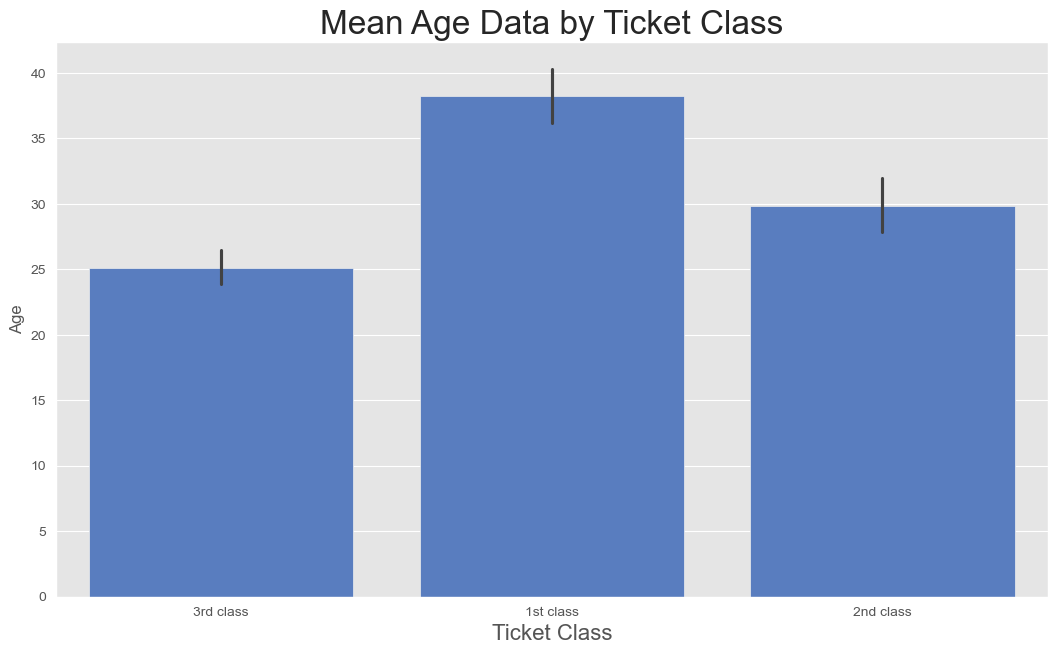

In [89]:
fig = plt.figure(figsize = (12.8, 7.2))
fig = sns.barplot(x = "Pclass?", y = "Age", data = df)
fig.set_title("Mean Age Data by Ticket Class", fontsize = 24)
fig.set_xlabel("Ticket Class", fontsize = 16)
fig.set_ylabel("Age", fontsiz = 16)
fig.tick_params(labelsize = 12)
plt.savefig("../outputs/mean-age-data-by-ticket-class.png")
plt.close()

![Mean Age data by Ticket Class](../outputs/mean-age-data-by-ticket-class.png)

*Figure showing the mean **Age** data for passenger with different **Ticket Class**.*

From the above figure, we had observed that:
* The mean **Age** data for passenger with **1st class ticket** are higher than those with **2nd/3rd class ticket**

Our guess:
* **Older passengers** with longer working experience may be healthier and more willing to purchase **higher-class tickets**.

In [64]:
fig = plt.figure(figsize = (12.8, 7.2))
fig = sns.barplot(x = "Sex", y = "Age",data = df)
fig.set_title("Mean Age Data by Sex", fontsize = 24)
fig.set_xlabel("Sex", fontsize = 16)
fig.set_ylabel("Age", fontsize = 16)
fig.tick_params(labelsize = 12)
plt.savefig("../outputs/mean-age-data-by-sex.png")
plt.close()

![Mean Age Data by Sex](../outputs/mean-age-data-by-sex.png)

*Figure showing the mean **Age** data by **Sex**.*

From the above figure, the mean **Age** data for **male** passenger is slightly higher than **female** passenger.

Thus, we might want to use **Sex** to regress on **Age**.